In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('df_combined.csv')

### Testing for a significant difference in the descriptor values in the active and inactive classes

In [3]:
from scipy.stats import mannwhitneyu

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

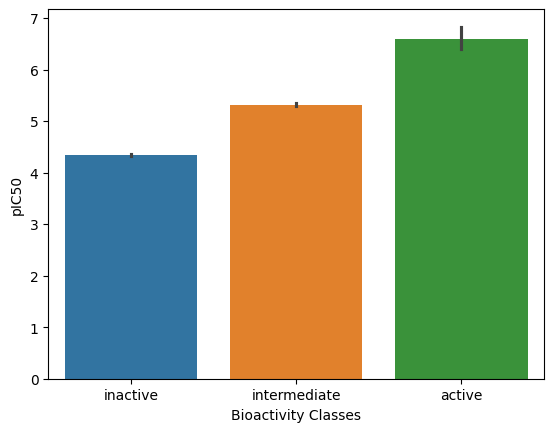

In [5]:
sns.barplot(df, x='bio_activity', y='pIC50', hue='bio_activity')
plt.xlabel('Bioactivity Classes')
plt.ylabel('pIC50');

In [6]:
df_actin = df[df.bio_activity != 'intermediate']

In [7]:
df_actin

,molecule_chembl_id,canonical_smiles,bio_activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1231,CHEMBL5189529,O=C1c2ccccc2C(=O)N1CCCCSc1nnc(-c2ccc(NS(=O)(=O...,inactive,602.616,5.72470,1.0,8.0,4.821023
1232,CHEMBL5190612,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,inactive,505.543,6.15692,1.0,6.0,4.598599
1233,CHEMBL5176952,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,inactive,505.543,6.15692,1.0,6.0,4.621602
1234,CHEMBL5184942,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,inactive,505.543,6.15692,1.0,6.0,4.619789


In [8]:
cols = list(df_actin.columns.values)[3:]

In [9]:
cols

['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']

In [10]:
def mwu_test(df_ai, *cols):
    descriptors = []
    p_values = []
    all_stats = []
    inferences = []
    for col in cols:
        descriptors.append(col)
        df = df_ai[[col, 'bio_activity']]
        active = df[df['bio_activity'] == 'active'][col]
        inactive = df[df['bio_activity'] == 'inactive'][col]
        stats, p_value = mannwhitneyu(active, inactive)
        p_values.append(p_value)
        all_stats.append(stats)
        if p_value > 0.05:
            inferences.append('There is no significant difference')
        else:
            inferences.append('There is a significant difference')
    result = pd.DataFrame({'Descriptor': descriptors, 'p_value': p_values, 'stat': all_stats, 'inference': inferences})
        
    return result

In [11]:
descriptor_test_inference = mwu_test(df_actin, *cols)
descriptor_test_inference.to_csv('descriptor_test_inference.csv', index=False)

In [12]:
descriptor_test_inference

,Descriptor,p_value,stat,inference
0,MW,8.904345e-05,26577.0,There is a significant difference
1,LogP,5.535814e-01,20381.0,There is no significant difference
2,NumHDonors,2.103118e-09,30053.0,There is a significant difference
3,NumHAcceptors,2.323801e-06,27951.5,There is a significant difference
4,pIC50,3.468328e-25,38554.0,There is a significant difference


### Boxplots

In [13]:
def plot_boxplots(df, *cols):
    for col in cols:
        ax = sns.boxplot(df_actin, x='bio_activity', y=col, hue='bio_activity')
        plt.xlabel('Bioactivity')
        plt.show()
    return ax

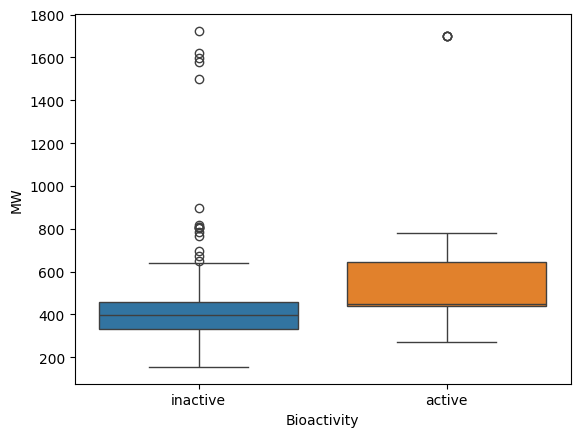

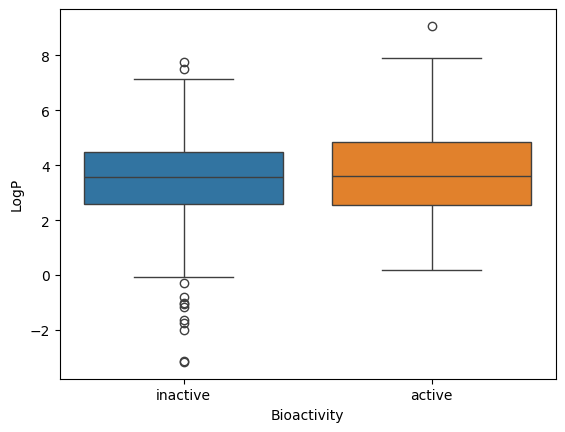

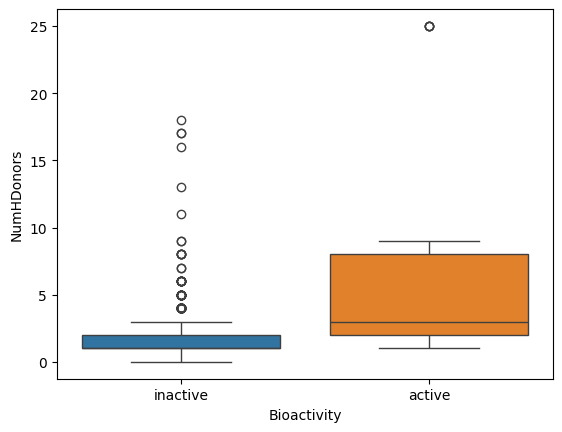

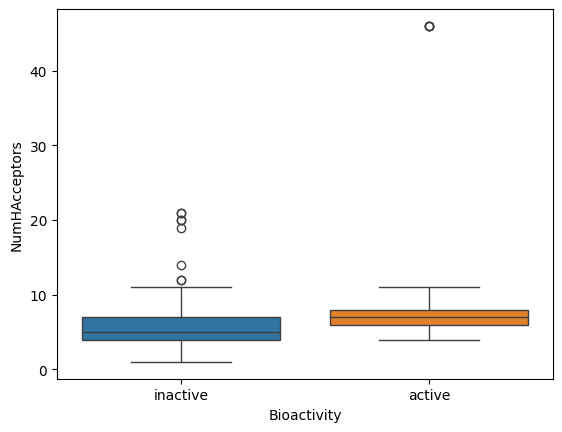

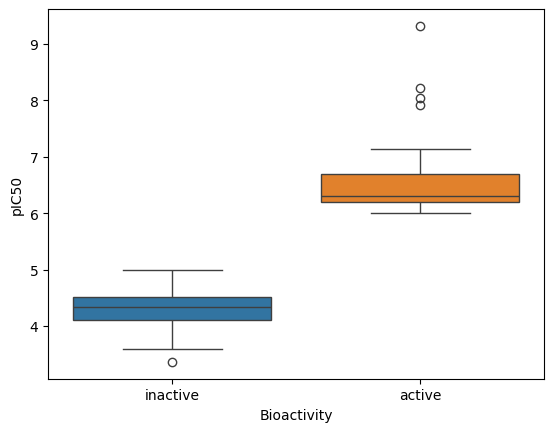

<Axes: xlabel='Bioactivity', ylabel='pIC50'>

In [14]:
plot_boxplots(df_actin, *cols)